In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from mplsoccer import Pitch, VerticalPitch


In [2]:
# Import the data from the csv
players_2017 = pd.read_csv("data/players_17.csv")
players_2021 = pd.read_csv("data/players_21.csv")


players_2017= players_2017.add_prefix("2017_")
players_2021= players_2021.add_prefix("2021_")

# Merge the dataframes together
players_all= pd.merge(players_2017, players_2021, left_on='2017_sofifa_id', right_on='2021_sofifa_id')
players = players_all.drop(['2017_sofifa_id', '2021_sofifa_id'], axis=1)

# Select the top 5% of the players
five_percent = round(len(players)/100*5)
top_players = players.head(five_percent)


In [3]:
# Pick the skill list to be analysed
Skill_list = ['attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys',\
             'skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control',\
             'movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance',\
             'power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots',\
             'mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure',\
             'defending_standing_tackle','defending_sliding_tackle']

# Setup the new dataframe
Skill_2017_vs_2021 = pd.DataFrame()

for skill in Skill_list:
    Skill_2017_vs_2021.loc[skill, "2017"] = top_players[f"2017_{skill}"].mean()
    Skill_2017_vs_2021.loc[skill, "2021"] = top_players[f"2021_{skill}"].mean()
    Skill_2017_vs_2021.loc[skill, "Change %"] = (top_players[f"2021_{skill}"].mean() - top_players[f"2017_{skill}"].mean())/top_players[f"2017_{skill}"].mean() *100
Skill_2017_vs_2021= Skill_2017_vs_2021.sort_values(by=['Change %'],ascending=False)

Skill_2017_vs_2021

,2017,2021,Change %
power_shot_power,68.207229,72.848193,6.804211
mentality_composure,73.421687,76.701205,4.466689
skill_long_passing,65.455422,67.279518,2.786777
mentality_aggression,64.566265,66.313253,2.705729
skill_curve,60.821687,62.262651,2.369161
mentality_vision,68.332530,69.797590,2.144016
defending_standing_tackle,54.072289,54.913253,1.555258
attacking_volleys,57.279518,58.168675,1.552312
skill_fk_accuracy,55.269880,56.079518,1.464882
mentality_interceptions,55.696386,56.501205,1.445012


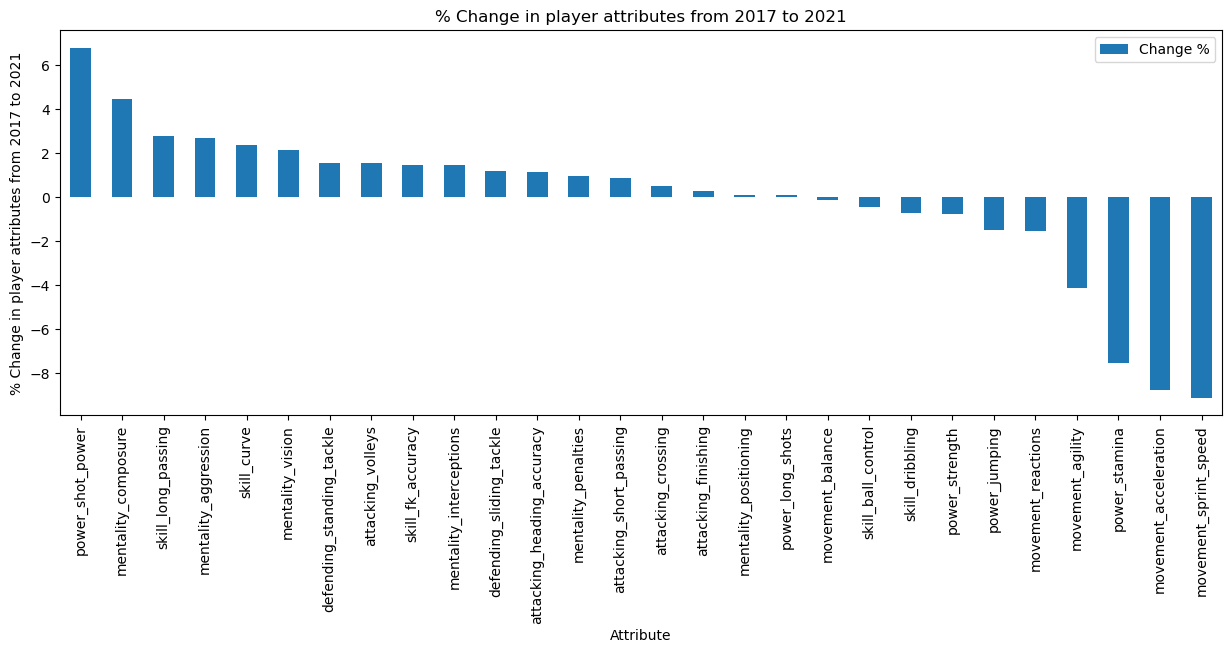

In [4]:
# Plot the data in a bar graph

Skill_2017_vs_2021_plot = Skill_2017_vs_2021[['Change %']].plot(kind="bar", rot=90,figsize=(15, 5))
Skill_2017_vs_2021_plot.set_title("% Change in player attributes from 2017 to 2021")
Skill_2017_vs_2021_plot.set_xlabel("Attribute")
Skill_2017_vs_2021_plot.set_ylabel("% Change in player attributes from 2017 to 2021")

# Save the figure
plt.savefig("Figures/Fig1.png") 

Presentation Notes:
Attributes of the top 5% of the players such as mentality, defending and attacking improved between the years of 2017 and 2021.
Attributes such as movement and power declined between the years of 2017 and 2021.
The biggest change in attribute between 2017 and 2021 has been in speed, with a decline of 9.12%.

In [5]:
# Remove substitue players from the dataset
players_all = players_all.loc[players_all["2021_nation_position"] != 'SUB']

# Summarise the foot preference data
left_vs_right= pd.pivot_table(players_all, values='2021_sofifa_id', index=['2021_nation_position'],
                       columns=['2021_preferred_foot'], aggfunc='count',fill_value=0).sort_values(by=['2021_nation_position'],ascending=True)

left_vs_right.columns = left_vs_right.columns.to_flat_index()

# Save the data into a dataframe
l_vs_r = pd.DataFrame()
l_vs_r['L % players'] = left_vs_right['Left']/(left_vs_right['Left']+left_vs_right['Right'])*100
l_vs_r['R % players'] = left_vs_right['Right']/(left_vs_right['Left']+left_vs_right['Right'])*100
l_vs_r['Dom player'] = np.where(l_vs_r['L % players']>l_vs_r['R % players'], 'L' ,'R')
l_vs_r =l_vs_r.reset_index()
l_vs_r

,2021_nation_position,L % players,R % players,Dom player
0,CAM,37.500000,62.500000,R
1,CB,0.000000,100.000000,R
2,CDM,9.090909,90.909091,R
3,CF,100.000000,0.000000,L
4,CM,0.000000,100.000000,R
5,GK,11.904762,88.095238,R
6,LB,83.333333,16.666667,L
7,LCB,34.285714,65.714286,R
8,LCM,27.586207,72.413793,R
9,LDM,0.000000,100.000000,R


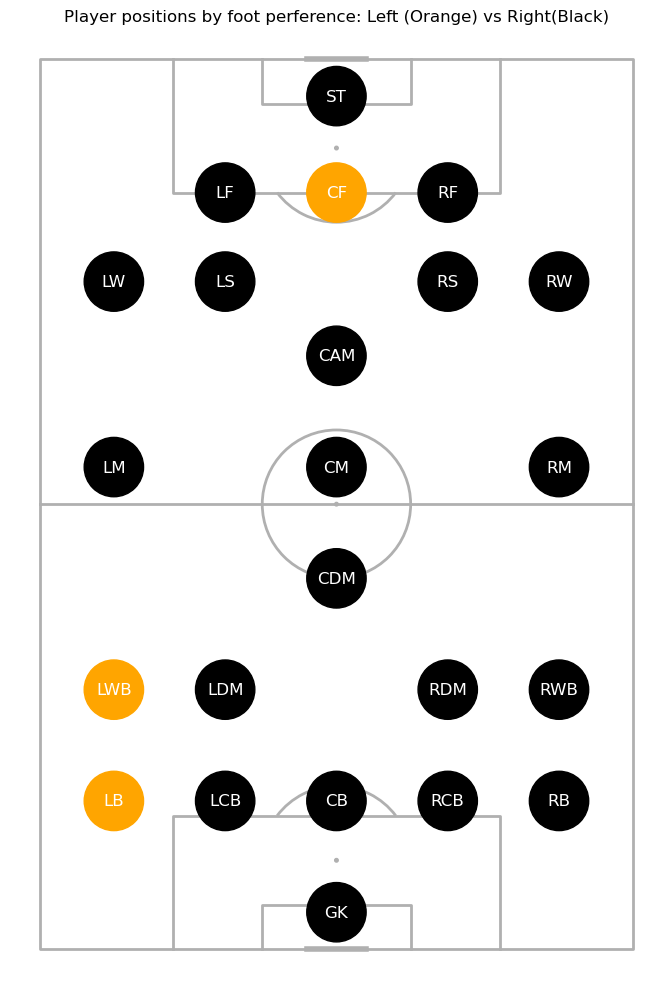

In [6]:
# Define the positions of the players on the field
positions = {"CAM": (40, 80),"CB": (40, 20),"CDM": (40, 50),"CF": (40, 102),"CM": (40, 65),"GK": (40, 5),"LB": (10, 20),"LCB": (25, 20),"LDM": (25, 35),"LF": (25,102),"LM": (10,65),"LS": (25,90),\
             "LW": (10, 90),"LWB": (10, 35),"RB": (70, 20),"RCB": (55,20),"RCM": (40, -15),"RDM": (55, 35),"RF": (55, 102),"RM": (70, 65),"RS": (55, 90),"RW": (70, 90),"RWB": (70, 35),"ST": (40, 115)}

# Create a pitch object
pitch = VerticalPitch()

# Create a figure and axis object
fig, ax = pitch.draw(figsize=(8, 10))
center_circle = plt.Circle((0, 0), 10, color='black', fill=False)

# Plot the positions as circles on the field
for pos in positions.keys():
    for index, row in l_vs_r.iterrows():
        if (row['Dom player'] == 'R') and (pos == row['2021_nation_position']):
            ax.add_artist(plt.Circle(positions[pos], 4, color='black'))
            break
        elif (row['Dom player'] == 'L') and (pos == row['2021_nation_position']):
            ax.add_artist(plt.Circle(positions[pos], 4, color='orange'))
            break


# Add labels to the positions
for label, pos in positions.items():
    ax.annotate(label, pos, ha="center", va="center", fontsize=12, color="white")

# Show the plot
plt.title("Player positions by foot perference: Left (Orange) vs Right(Black)")

# Save the figure
plt.savefig("Figures/Fig2.png") 
plt.show()


Presentation Notes:
Out of all the positions the left foot players dominate the positions: Center Forwardv(CF), Left Back(LB),  Left Wing Back(LWB).
CF is an attacking position, while LB and LWB are defensive and offensive positions, respectively, on the left side of the pitch.
GK is the most right foot dominated position with 37 right foot preferring players compared to 5 left foot preferreing players.
LB is the most left foot dominated position with 25 left foot preferring players compared to 5 right foot preferreing players.